<a href="https://colab.research.google.com/github/meskeremg/FinalCapstone/blob/main/Step_4_1_NLP_Book_Recommendation_Modeling_with_Count_Vectorizer_and_Cosine_Similarity_Meskerem_Goshime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 4-1: NLP Book Recommendation System
# Model 1 - Count Vectorizer and Cosine Similarity

Amazon Books Reviews Data data source: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=books_data.csv This is a rich dataset for Natural Language Processing containing 3,000,000 text reviews from users as well as text descriptions and categories for 212,403 books. Therefore it is ideal for text analysis.

# Importing libraries and reading the data

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import re

In [ ]:
# connecting to google drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1dnURk-tdodpKuv-3Ic92ELyNoQLs9tLA'})
fileDownloaded.GetContentFile('books_after_preprocessing.csv')

In [ ]:
# reading the file

books = pd.read_csv('books_after_preprocessing.csv')

In [ ]:
books.sample(3)

,index,Title,review/score_Avg,review/score_Count,authors,publishedDate,description_categories
133673,61128,working inside out tools for change,5.000000,4.0,['Margo Adair'],2003.0,body mind spirit five meditation book accompan...
96518,106006,tetrascroll goldilocks and the three bears,4.000000,1.0,['R. Buckminster Fuller'],1982.0,architecture series twentyone original triangu...
3242,107636,a new text for a modern china,4.333333,3.0,"['Irene Liu', 'Xiaoqi Li']",1998.0,foreign language study ideal intermediate text...


# Taking a subset of the data by selecting the books which received more than 10 reviews

I am taking a subset of the book data to preform Count Vectorizer and Cosine Similarity. The full dataset proved to be too large even with Google Colab Pro and enabling GPU and High Ram.

In [ ]:
# books that have more than 10 reviews

books_sm = books[books['review/score_Count'] > 10]
books_sm.head(3)

,index,Title,review/score_Avg,review/score_Count,authors,publishedDate,description_categories
30,95768,1 is one,4.866667,30.0,['Tasha Tudor'],2015.0,juvenile nonfiction rhyming verse present numb...
34,76202,1 ragged ridge road,4.277778,18.0,"['Leonard Foglia', 'David Richards']",1998.0,fiction estranged husband carol robbins young ...
36,110134,10 button book,3.142857,28.0,['William Accorsi'],1999.0,juvenile nonfiction verse introduce number one...


In [ ]:
books_sm = books_sm.reset_index(drop=True)
books_sm = books_sm.drop(columns=['index'])
books_sm.head(3)


,Title,review/score_Avg,review/score_Count,authors,publishedDate,description_categories
0,1 is one,4.866667,30.0,['Tasha Tudor'],2015.0,juvenile nonfiction rhyming verse present numb...
1,1 ragged ridge road,4.277778,18.0,"['Leonard Foglia', 'David Richards']",1998.0,fiction estranged husband carol robbins young ...
2,10 button book,3.142857,28.0,['William Accorsi'],1999.0,juvenile nonfiction verse introduce number one...


# Vectorizing and creating cosine similarity matrix

In [ ]:
#Importing needed libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Vectorizing and creating the sparse matrix

cv = CountVectorizer() 
count_matrix_sm = cv.fit_transform(books_sm['description_categories'])

In [ ]:
count_matrix_sm

<29560x103898 sparse matrix of type '<class 'numpy.int64'>'
	with 1653000 stored elements in Compressed Sparse Row format>

In [ ]:
# Creating the cosine similarity matrix. This shows the similarity score of each book description with all other book descriptions.

cosine_sim_sm = cosine_similarity(count_matrix_sm)
print(cosine_sim_sm.shape)
cosine_sim_sm

(29560, 29560)


array([[1.        , 0.        , 0.38575837, ..., 0.03928371, 0.04303315,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.09325048,
        0.04445542],
       [0.38575837, 0.        , 1.        , ..., 0.03636965, 0.        ,
        0.        ],
       ...,
       [0.03928371, 0.        , 0.03636965, ..., 1.        , 0.04057204,
        0.        ],
       [0.04303315, 0.09325048, 0.        , ..., 0.04057204, 1.        ,
        0.06356417],
       [0.        , 0.04445542, 0.        , ..., 0.        , 0.06356417,
        1.        ]])

In [ ]:
# The cosine similarity of the book on the 0 index value with all other books.

cosine_sim_sm[0]

array([1.        , 0.        , 0.38575837, ..., 0.03928371, 0.04303315,
       0.        ])

# Finding the 5 most similar books to the book in 0 index place

In [ ]:
sim_0 = pd.DataFrame(cosine_sim_sm[0], columns=['sim']).sort_values(by='sim', ascending=False)
sim_0.reset_index(inplace = True)
sim_0.head()

,index,sim
0,0,1.000000
1,2,0.385758
2,17280,0.384900
3,25807,0.372678
4,19458,0.372678


In [ ]:
print('Chosen book\n')
print(books_sm['Title'][0])
print(books_sm['description_categories'][0], '\n')
print('Recommended books\n')
for i in range(1,6):
  indexes = int(sim_0.loc[i]['index'])
  print('Title: ', books_sm['Title'][indexes])
  print('Description: ', books_sm['description_categories'][indexes])
  

Chosen book

1 is one
juvenile nonfiction rhyming verse present number one twenty illustration animal flower child 

Recommended books

Title:  10 button book
Description:  juvenile nonfiction verse introduce number one ten ten real button snap book
Title:  red lace yellow lace
Description:  juvenile nonfiction rhyming text teach young child tie shoe
Title:  the skin you live in
Description:  juvenile nonfiction rhyming verse describes diversity skin color promotes selfesteem explores child unique similar time
Title:  sticky situations 2 365 devotions for elementary kids
Description:  juvenile nonfiction present bible verse help elementaryage child deal situation topic friend family obedience compassion
Title:  i spy 4 picture riddle books school reader collection lvl 1 scholastic reader collection
Description:  juvenile nonfiction rhyming verse ask reader find hidden object photograph


# Making a Function which finds similar books to a given title

In [ ]:
def find_similar(title):
    index_val = books_sm[books_sm['Title'] == title].index
    sim = cosine_sim_sm[index_val]
    sim = pd.DataFrame(sim).T
    sim.columns = ['sim']
    sim = sim.sort_values(by='sim', ascending = False)
    sim = sim.reset_index()

    print('Chosen book: ', title)
    print('Descripton:', books_sm['description_categories'][index_val].values, '\n')
    print('Recommended books: ')

    for i in range(1,6):
        indexes = int(sim.loc[i]['index'])
        print(i, '. ', 'Title: ', books_sm[title_col][indexes])
        print("    ", 'Description: ', books_sm[desc_col][indexes])


In [ ]:
title1 = '1 is one'
find_similar(title1)

Chosen book:  1 is one
Descripton: ['juvenile nonfiction rhyming verse present number one twenty illustration animal flower child'] 

Recommended books: 
1 .  Title:  10 button book
     Description:  juvenile nonfiction verse introduce number one ten ten real button snap book
2 .  Title:  red lace yellow lace
     Description:  juvenile nonfiction rhyming text teach young child tie shoe
3 .  Title:  the skin you live in
     Description:  juvenile nonfiction rhyming verse describes diversity skin color promotes selfesteem explores child unique similar time
4 .  Title:  sticky situations 2 365 devotions for elementary kids
     Description:  juvenile nonfiction present bible verse help elementaryage child deal situation topic friend family obedience compassion
5 .  Title:  i spy 4 picture riddle books school reader collection lvl 1 scholastic reader collection
     Description:  juvenile nonfiction rhyming verse ask reader find hidden object photograph


In [ ]:
title2 = 'spanish stepbystep'
find_similar(title2)

Chosen book:  spanish stepbystep
Descripton: ['foreign language study proven grammarbased approach give real mastery spanish language use advanced spanish step step progressive grammarbased approach conquer intermediate advanced spanishlanguage topic stepbystep approach give real confidence tool need achieve high spanish proficiency youll get quick review key grammar basic move advanced topic need true mastery language complete coverage verb tense beyond present past irregular verb sentence structure part speech book give thorough overview advanced grammar topic also introduces hundred new vocabulary word reinforced reading put new term everyday context'] 

Recommended books: 
1 .  Title:  the big red book of spanish vocabulary
     Description:  foreign language study new dramatically improved threepronged approach learning spanish vocabulary big red book spanish vocabulary much much spanish vocabulary reference unique complete resource combine three complementary approach vocabulary 

In [ ]:
title3 = 'to kill a mockingbird'
find_similar(title3)

Chosen book:  to kill a mockingbird
Descripton: ['fiction voted america bestloved novel pbs great american read harper lee pulitzer prizewinning masterwork honor injustice deep southand heroism one man face blind violent hatred one cherished story time kill mockingbird translated forty language sold forty million copy worldwide served basis enormously popular motion picture voted one best novel twentieth century librarian across country gripping heartwrenching wholly remarkable tale comingofage south poisoned virulent prejudice view world great beauty savage inequity eye young girl fathera crusading local lawyerrisks everything defend black man unjustly accused terrible crime'] 

Recommended books: 
1 .  Title:  to kill a mocking bird
     Description:  drama harper lee classic novel lawyer deep south defending black man charged rape white girl one bestloved story time kill mockingbird earned many distinction since original publication pulitzer prize translated forty language sold thir

# Accuracy Mesasure: Discounted Cumulative Gains
Relevancy Scoring Key:

Most relevant score => 2

Somewhat relevant score => 1

Least relevant score => 0

Methodology: I manually went through the description of the chosen item and the recommended items to determine relevancy value.

DCG (Discounted Cumulative Gains) = Relevancy Score/(LOG(Recommendation Rank+1))

Formula Source: https://towardsdatascience.com/an-exhaustive-list-of-methods-to-evaluate-recommender-systems-a70c05e121de

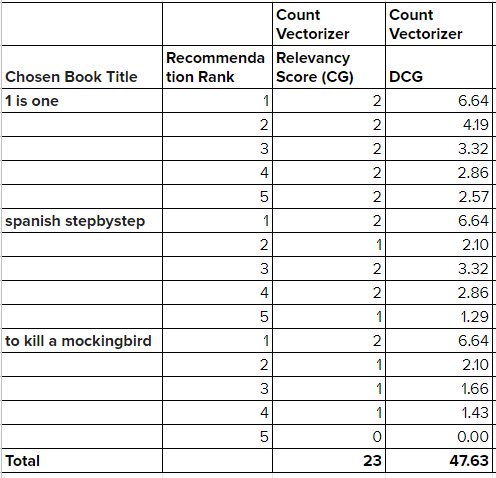


 
In the next steps, I will use the Spacy model and SBERT Sentence Embedding model and compare their performance with the performance of this model.
